<a href="https://colab.research.google.com/github/AashiDutt/Intro-to-Gemma-Models/blob/main/PaliGemma_Demo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Installations

In [1]:
!pip install bitsandbytes transformers accelerate peft -q
!pip install -U "huggingface_hub[cli]"

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 119.8/119.8 MB 7.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 309.4/309.4 kB 21.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 251.6/251.6 kB 13.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.3/21.3 MB 45.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 402.6/402.6 kB 7.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.7/67.7 kB 7.4 MB/s eta 0:00:00
  Attempting uninstall: huggingface_hub
    Found existing installation: huggingface-hub 0.23.3
    Uninstalling huggingface-hub-0.23.3:
      Successfully uninstalled huggingface-hub-0.23.3


In [2]:
!huggingface-cli login


    _|    _|  _|    _|    _|_|_|    _|_|_|  _|_|_|  _|      _|    _|_|_|      _|_|_|_|    _|_|      _|_|_|  _|_|_|_|
    _|    _|  _|    _|  _|        _|          _|    _|_|    _|  _|            _|        _|    _|  _|        _|
    _|_|_|_|  _|    _|  _|  _|_|  _|  _|_|    _|    _|  _|  _|  _|  _|_|      _|_|_|    _|_|_|_|  _|        _|_|_|
    _|    _|  _|    _|  _|    _|  _|    _|    _|    _|    _|_|  _|    _|      _|        _|    _|  _|        _|
    _|    _|    _|_|      _|_|_|    _|_|_|  _|_|_|  _|      _|    _|_|_|      _|        _|    _|    _|_|_|  _|_|_|_|

    To login, `huggingface_hub` requires a token generated from https://huggingface.co/settings/tokens .
Enter your token (input will not be visible): 
Add token as git credential? (Y/n) Y
Token is valid (permission: fineGrained).
Cannot authenticate through git-credential as no helper is defined on your machine.
You might have to re-authenticate when pushing to the Hugging Face Hub.
Run the following command in your termin

### Imports

In [1]:
from PIL import Image, ImageDraw
import torch
import requests
from io import BytesIO
import matplotlib.pyplot as plt
from transformers import AutoProcessor, PaliGemmaForConditionalGeneration

### Set up PalliGemma model

In [2]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

model_id = "google/paligemma-3b-mix-224"

model = PaliGemmaForConditionalGeneration.from_pretrained(model_id)

processor = AutoProcessor.from_pretrained(model_id, torch_dtype = torch.bfloat16)


config.json:   0%|          | 0.00/1.03k [00:00<?, ?B/s]

model.safetensors.index.json:   0%|          | 0.00/62.6k [00:00<?, ?B/s]

model-00001-of-00003.safetensors:   0%|          | 0.00/4.95G [00:00<?, ?B/s]

model-00002-of-00003.safetensors:   0%|          | 0.00/5.00G [00:00<?, ?B/s]

model-00003-of-00003.safetensors:   0%|          | 0.00/1.74G [00:00<?, ?B/s]

`config.hidden_act` is ignored, you should use `config.hidden_activation` instead.
Gemma's activation function will be set to `gelu_pytorch_tanh`. Please, use
`config.hidden_activation` if you want to override this behaviour.
See https://github.com/huggingface/transformers/pull/29402 for more details.


Loading checkpoint shards:   0%|          | 0/3 [00:00<?, ?it/s]

generation_config.json:   0%|          | 0.00/137 [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/699 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/40.0k [00:00<?, ?B/s]

tokenizer.model:   0%|          | 0.00/4.26M [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/17.5M [00:00<?, ?B/s]

added_tokens.json:   0%|          | 0.00/24.0 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/607 [00:00<?, ?B/s]

### Input Image

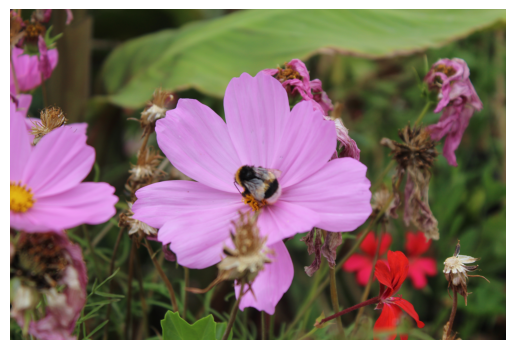

In [3]:
image_file = "https://huggingface.co/datasets/huggingface/documentation-images/resolve/main/bee.jpg?download=true"

raw_image = Image.open(requests.get(image_file, stream=True).raw).convert("RGB")

plt.imshow(raw_image)
plt.axis('off')
plt.show()

### Input Prompt ---> Processor ---> Generated output

In [4]:
prompt = "What is the flower called?"

inputs = processor(prompt, raw_image, return_tensors="pt")

output = model.generate(**inputs, max_new_tokens=20)

print(processor.decode(output[0], skip_special_tokens=True)[len(prompt):])


daisy


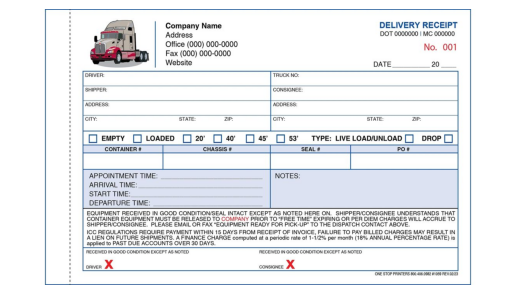

In [5]:
# image_file = "https://i.natgeofe.com/n/548467d8-c5f1-4551-9f58-6817a8d2c45e/NationalGeographic_2572187_square.jpg"
image_file = "https://img1.wsimg.com/isteam/ip/ccb93f6f-3512-4d59-b3a6-f777de641890/Booked_Trucking_Container_Delivery_Rec-b91ab19.png/:/cr=t:0%25,l:0%25,w:100%25,h:100%25/rs=w:1280"

raw_image = Image.open(requests.get(image_file, stream=True).raw).convert("RGB")

plt.imshow(raw_image)
plt.axis('off')
plt.show()

In [6]:
# prompt = "Identify the animal"
prompt = "describe the logo on the receipt"

inputs = processor(prompt, raw_image, return_tensors="pt")

output = model.generate(**inputs, max_new_tokens=20)

print(processor.decode(output[0], skip_special_tokens=True)[len(prompt):])


truck


PaliGemma can detect entities in an image using the detect [entity] prompt. It will output the location for the bounding box coordinates in the form of special <loc[value]> tokens, where value is a number that represents a normalized coordinate. Each detection is represented by four location coordinates in the order y_min, x_min, y_max, x_max, followed by the label that was detected in that box. To convert values to coordinates, you first need to divide the numbers by 1024, then multiply y by the image height and x by its width. This will give you the coordinates of the bounding boxes, relative to the original image size.

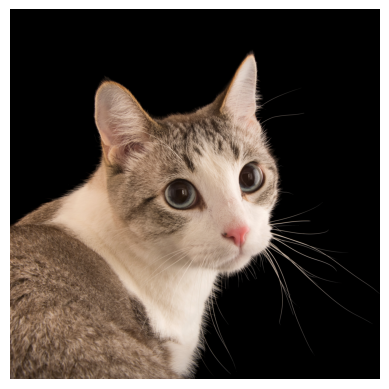

<image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image

In [8]:
image_file = "https://i.natgeofe.com/n/548467d8-c5f1-4551-9f58-6817a8d2c45e/NationalGeographic_2572187_square.jpg"
raw_image = Image.open(requests.get(image_file, stream=True).raw)

plt.imshow(raw_image)
plt.axis('off')
plt.show()

prompt = "detect animal and return coordinates of animal in the image"

inputs = processor(prompt, raw_image, return_tensors="pt").to(device)

output = model.generate(**inputs, max_new_tokens=50)

output_text = processor.decode(output[0], skip_special_tokens=False)

print(output_text)